In [9]:
# ways to change

def changes(amount, coins):
    '''returns number of ways to change amount given the coins, as list [c0, c1, ...]'''
    ways = [0] * (amount + 1) # empty list with amt+1 entries
    ways[0] = 1 # set first entry to 1
    for coin in coins: # for all coins in the list
        for j in range(coin, amount + 1): # j from denomination of current coin to amt+1
            ways[j] += ways[j - coin] # increment number of ways by current denomination offset by current coin
            # by j in range we are below the given amount: we look back to the previous coin and add the number of ways
        print(ways)
    return ways[amount] # the last entry now holds the number of ways we can change the amount with the coins provided

if __name__=="__main__":
    print(changes(12, [1, 5, 10, 25]))
    print(changes(4, [1, 3]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 4]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 4]
4
[1, 1, 1, 1, 1]
[1, 1, 1, 2, 2]
2


In [10]:
# stable marriages

men = [-1,-1,-1]
women = [-1,-1,-1]
prefm = [[2,0,1], [1,0,2], [2,1,0]]
prefw = [[0,1,2], [2,1,0], [0,2,1]]

if __name__=="__main__":
    while -1 in men:
        for im, m in enumerate(men):
            if m < 0:
                for iw, w in enumerate(prefm[im]):
                    if women[w]<0: # current woman not yet engaged
                        men[im] = prefm[im][iw]
                        women[w] = im
                        break
                    elif prefw[iw].index(im)<w: # this match is a better match
                        men[women[iw]] = -1
                        men[im] = prefm[im][iw]
                        women[w] = im
                        break
    print('men: ', men)
    print('women: ', women)

men:  [2, 0, 1]
women:  [1, 2, 0]


In [16]:
# McNuggets numbers
from itertools import product

if __name__=="__main__":
    nuggets = set(range(101))
    for s, n, t in product(range(100//6+1), range(100//9+1), range(100//20+1)):
        nuggets.discard(6*s + 9*n + 20*t)
    print(nuggets)

{1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 22, 23, 25, 28, 31, 34, 37, 43}


0.0030000000000000027
0.23307692307692324


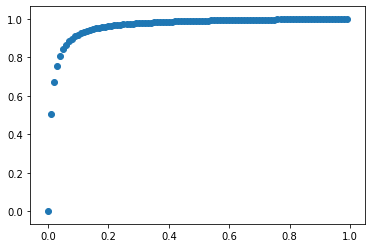

In [6]:
# test delta-augment
import math
import numpy as np
import matplotlib.pyplot as plt

def augmt(x, n):
    '''augment small values: x=val to augment, n=factor (larger->stronger augmentation)'''
    return (n+1)*x / (n*x + 1)

if __name__=="__main__":
    delta = 1 - 0.997
    print(delta)
    print(augmt(delta, 100))
    xrg = [x/100 for x in range(0,100)]
    y = [augmt(x,100) for x in xrg]
    plt.scatter(xrg, y)
    plt.show()

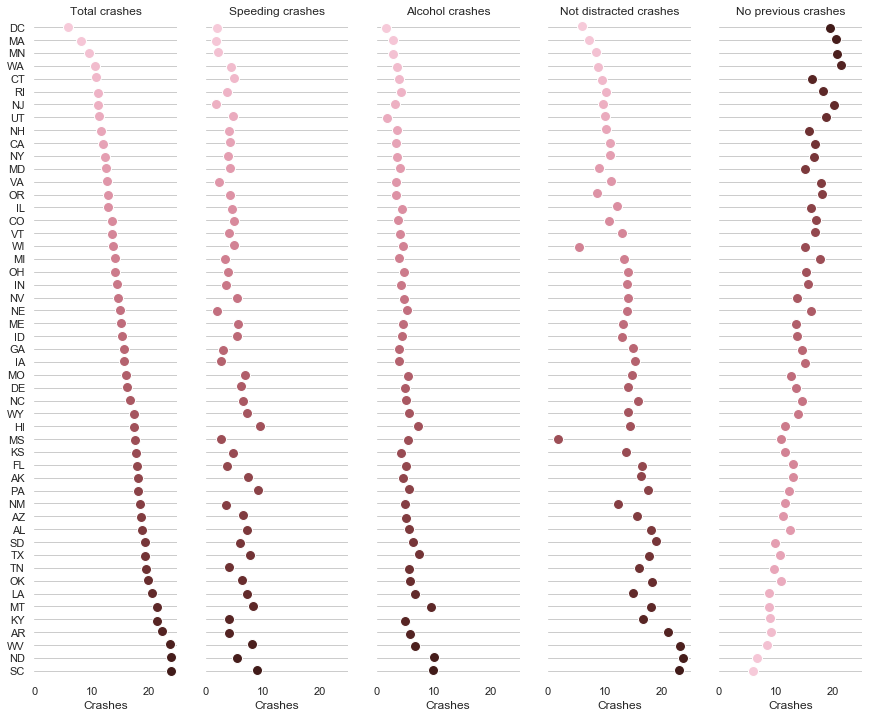

In [2]:

import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [1]:
# binomial
import timeit
import math
import scipy.special

def smult(a, b):
    '''multiply all factors from a to b inclusive'''
    res = 1
    for x in range(a,b+1):
        res *= x
    return res

def binom(n, k):
    '''calculate binomial'''
    mn = min(n-k, k+2)
    mx = max(mn, k+1)
    return smult(mx, n) / smult(1, mn)

def binomMth(n, k):
    a = math.factorial(n)
    b = math.factorial(k)
    div = a // (b*(n-k))

if __name__=="__main__":
    print(binom(5, 3))
    print(binom(5, 2))
    print(binom(6, 2))
    print(binom(6, 3))
    print(binom(25, 21))
    print(timeit.timeit('binom(25, 21)', 'from __main__ import binom, smult', number=100000))
    print(timeit.timeit('special.binom(25, 21)', 'from scipy import special', number=100000))
    print(timeit.timeit('binomMth(25, 21)', 'from __main__ import binomMth', number=100000))

10.0
10.0
5.0
20.0
12650.0
0.1361733
0.1307136
0.08179999999999998


In [19]:
# cf

def cf(a,b):
    if a == 1:
        return (1, b)
    return (a // b, b // a, cf((b-a) % a, a))

if __name__=="__main__":
    print(cf(12,23))
    print(cf(12,227))

(0, 1, (0, 1, (1, 11)))
(0, 18, (0, 1, (1, 11)))


In [12]:
# Bayes classification
import os
import re
import string
import math
 
DATA_DIR = 'D:\BernieData\DeepL\data'
target_names = ['ham', 'spam']
 
def get_data(DATA_DIR):
    subfolders = ['enron%d' % i for i in range(1,4)]
    data = []
    target = []
    for subfolder in subfolders:
        # spam
        spam_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'spam'))
        for spam_file in spam_files:
            with open(os.path.join(DATA_DIR, subfolder, 'spam', spam_file), encoding="latin-1") as f:
                data.append(f.read())
                target.append(1)
 
        # ham
        ham_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'ham'))
        for ham_file in ham_files:
            with open(os.path.join(DATA_DIR, subfolder, 'ham', ham_file), encoding="latin-1") as f:
                data.append(f.read())
                target.append(0)
 
    return data, target

class SpamDetector(object):
    """Implementation of Naive Bayes for binary classification"""
    def clean(self, s):
        translator = str.maketrans("", "", string.punctuation)
        return s.translate(translator) # takes translation table to replace/translate characters in the given string
 
    def tokenize(self, text):
        text = self.clean(text).lower()
        return re.split("\W+", text) # split words
 
    def get_word_counts(self, words):
        word_counts = {}
        for word in words:
            word_counts[word] = word_counts.get(word, 0.0) + 1.0
        return word_counts
    
    def fit(self, X, Y):
        self.num_messages = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        self.num_messages['spam'] = sum(1 for label in Y if label == 1)
        self.num_messages['ham'] = sum(1 for label in Y if label == 0)
        self.log_class_priors['spam'] = math.log(self.num_messages['spam'] / n)
        self.log_class_priors['ham'] = math.log(self.num_messages['ham'] / n)
        self.word_counts['spam'] = {}
        self.word_counts['ham'] = {}

        for x, y in zip(X, Y):
            c = 'spam' if y == 1 else 'ham'
            counts = self.get_word_counts(self.tokenize(x))
            for word, count in counts.items():
                if word not in self.vocab:
                    self.vocab.add(word)
                if word not in self.word_counts[c]:
                    self.word_counts[c][word] = 0.0

                self.word_counts[c][word] += count
    
    def predict(self, X):
        result = []
        for x in X:
            counts = self.get_word_counts(self.tokenize(x))
            spam_score = 0
            ham_score = 0
            for word, _ in counts.items():
                if word not in self.vocab: continue

                # add Laplace smoothing
                log_w_given_spam = math.log( (self.word_counts['spam'].get(word, 0.0) + 1) / (self.num_messages['spam'] + len(self.vocab)) )
                log_w_given_ham = math.log( (self.word_counts['ham'].get(word, 0.0) + 1) / (self.num_messages['ham'] + len(self.vocab)) )

                spam_score += log_w_given_spam
                ham_score += log_w_given_ham

            spam_score += self.log_class_priors['spam']
            ham_score += self.log_class_priors['ham']

            if spam_score > ham_score:
                result.append(1)
            else:
                result.append(0)
        return result

if __name__ == '__main__':
    X, y = get_data(DATA_DIR)
    MNB = SpamDetector()
    MNB.fit(X[100:], y[100:])
 
    pred = MNB.predict(X[:100])
    true = y[:100]
 
    accuracy = sum(1 for i in range(len(pred)) if pred[i] == true[i]) / float(len(pred))
    print("{0:.4f}".format(accuracy))

0.1500


In [13]:
print(re.split("\W+", 'this is a test'))
print(list(zip([0, 1], ['a', 'b', 'c'])))

['this', 'is', 'a', 'test']
[(0, 'a'), (1, 'b')]


In [2]:
# Bayes classification
import os
import re
import string
import math
 
DATA_DIR = 'D:\BernieData\DeepL\data'
target_names = ['inlabel', 'offlabel']
 
def get_data(DATA_DIR):
    subfolders = ['paiberus%d' % i for i in range(1,2)]
    data = []
    target = []
    for subfolder in subfolders:
        # offlabel
        off_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'offlabel'))
        for off_file in off_files:
            with open(os.path.join(DATA_DIR, subfolder, 'offlabel', off_file), encoding="latin-1") as f:
                data.append(f.read())
                target.append(1) 
        # inlabel
        in_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'inlabel'))
        for in_file in in_files:
            with open(os.path.join(DATA_DIR, subfolder, 'inlabel', in_file), encoding="latin-1") as f:
                data.append(f.read())
                target.append(0) 
    return data, target # data holds the text, target the indicator (1==off, 0==in)

class OfflDetector(object):
    """Implementation of Naive Bayes for binary classification"""
    def clean(self, s): # str.punctuation = !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
        translator = str.maketrans("", "", string.punctuation) # a one to one mapping of a character to its translation
        return s.translate(translator) # takes translation table to replace/translate characters in the given string
 
    def tokenize(self, text):
        text = self.clean(text).lower()
        return re.split("\W+", text) # split words
 
    def get_word_counts(self, words):
        word_counts = {}
        for word in words:
            word_counts[word] = word_counts.get(word, 0.0) + 1.0
        return word_counts
    
    def fit(self, X, Y): # X = texts, Y = labels
        self.num_texts = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        self.num_texts['offlabel'] = sum(1 for label in Y if label == 1) # add labels
        self.num_texts['inlabel'] = sum(1 for label in Y if label == 0)
        self.log_class_priors['offlabel'] = math.log(self.num_texts['offlabel'] / n) # probabilities are counts / n_words
        self.log_class_priors['inlabel'] = math.log(self.num_texts['inlabel'] / n) # take the log for umerical stability
        self.word_counts['offlabel'] = {}
        self.word_counts['inlabel'] = {}

        for x, y in zip(X, Y): # for text-label combinations
            c = 'offlabel' if y == 1 else 'inlabel'
            counts = self.get_word_counts(self.tokenize(x)) # build a count dict of words
            for word, count in counts.items():
                if word not in self.vocab: # add word to vocabulary if not already in
                    self.vocab.add(word)
                if word not in self.word_counts[c]: # if word not in counts dict, add (with count 0)
                    self.word_counts[c][word] = 0.0
                self.word_counts[c][word] += count # add current word count to wordcount
        #print(self.num_texts)
    
    def predict(self, X):
        result = []
        for x in X:
            counts = self.get_word_counts(self.tokenize(x))
            off_score = 0
            in_score = 0
            for word, _ in counts.items():
                if word not in self.vocab:
                    continue
                # add Laplace smoothing
                log_w_given_off = math.log( (self.word_counts['offlabel'].get(word, 0.0) + 1) / (self.num_texts['offlabel'] + len(self.vocab)) )
                log_w_given_in = math.log( (self.word_counts['inlabel'].get(word, 0.0) + 1) / (self.num_texts['inlabel'] + len(self.vocab)) )
                off_score += log_w_given_off # adding logs instead of multiplying probs (which would be very small)
                in_score += log_w_given_in
            off_score += self.log_class_priors['offlabel']
            in_score += self.log_class_priors['inlabel']

            if off_score > in_score:
                result.append(1)
            else:
                result.append(0)
        return result

if __name__ == '__main__':
    X, y = get_data(DATA_DIR)
    #print(X)
    #print(y)
    MNB = OfflDetector()
    MNB.fit(X[10:], y[10:]) # leave the first two to test the prediction
 
    pred = MNB.predict(X[:10]) # test with the first two
    true = y
 
    accuracy = sum(1 for i in range(len(pred)) if pred[i] == true[i]) / float(len(pred))
    print("{0:.4f}".format(accuracy))

0.9000


In [2]:
#!/usr/bin/env python
# coding: utf8
"""A simple example of extracting relations between phrases and entities using
spaCy's named entity recognizer and the dependency parse. Here, we extract
money and currency values (entities labelled as MONEY) and then check the
dependency tree to find the noun phrase they are referring to – for example:
$9.4 million --> Net income.

Compatible with: spaCy v2.0.0+
Last tested with: v2.1.0
"""
from __future__ import unicode_literals, print_function

import plac
import spacy

TEXTS = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

@plac.annotations(
    model=("Model to load (needs parser and NER)", "positional", None, str)
)
def main(model="en_core_web_sm"):
    nlp = spacy.load(model)
    print("Loaded model '%s'" % model)
    print("Processing %d texts" % len(TEXTS))

    for text in TEXTS:
        doc = nlp(text)
        relations = extract_currency_relations(doc)
        for r1, r2 in relations:
            print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))

def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    get_sort_key = lambda span: (span.end - span.start, span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
            seen_tokens.update(range(span.start, span.end))
    return result


def extract_currency_relations(doc):
    # Merge entities and noun chunks into one token
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)

    relations = []
    for money in filter(lambda w: w.ent_type_ == "MONEY", doc):
        if money.dep_ in ("attr", "dobj"):
            subject = [w for w in money.head.lefts if w.dep_ == "nsubj"]
            if subject:
                subject = subject[0]
                relations.append((subject, money))
        elif money.dep_ == "pobj" and money.head.dep_ == "prep":
            relations.append((money.head.head, money))
    return relations

if __name__ == "__main__":
    #plac.call(main)
    main()

    # Expected output:
    # Net income      MONEY   $9.4 million
    # the prior year  MONEY   $2.7 million
    # Revenue         MONEY   twelve billion dollars
    # a loss          MONEY   1b

Loaded model 'en_core_web_sm'
Processing 2 texts
Net income	MONEY	$9.4 million
the prior year	MONEY	$2.7 million
Revenue   	MONEY	twelve billion dollars
a loss    	MONEY	1b


In [5]:
# Russian doll problem

def russdoll(n):
    if n >= 1000:
        return n-3
    return russdoll(russdoll(n+5))

if __name__ == "__main__":
    print(russdoll(84))
    print(russdoll(85))

997
998


In [46]:
# FFT
import numpy as np
import timeit

def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 16:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        fexp = -2j * np.pi / N
        #factor = np.exp(-2j * np.pi * np.arange(N) / N)
        factor = np.exp(fexp * np.arange(N))
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

if __name__ == "__main__":
    #print(FFT([1,1,1,1,1,2,2,2,2,3,3,3,4,4,4,5,5,6,7,8,9,10,12,12,12,12,13,13,13,13,13,14]))
    print(timeit.timeit('DFT_slow([1,1,1,1,1,2,2,2,2,3,3,3,4,4,4,5,5,6,7,8,9,10,12,12,12,12,13,13,13,13,13,14])', 'from __main__ import DFT_slow', number=10000)) 
    print(timeit.timeit('FFT([1,1,1,1,1,2,2,2,2,3,3,3,4,4,4,5,5,6,7,8,9,10,12,12,12,12,13,13,13,13,13,14])', 'from __main__ import FFT', number=10000))

0.6405834999999911
0.6187494999999785


d:\anaconda\envs\venv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


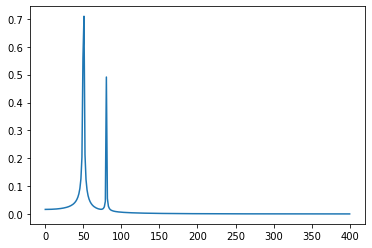

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [1]:
import math
import matplotlib.pyplot as plt
from fractions import Fraction as Fr

def hn(n):
    return sum([1/x for x in range(1,n+1)])

def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
            A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)

def bernoulli2():
    A, m = [], 0
    while True:
        A.append(Fr(1, m+1))
        for j in range(m, 0, -1):
            A[j-1] = j*(A[j-1] - A[j])
        yield A[0] # (which is Bm)
        m += 1

def gamma(n, nb):
    return hn(n) - math.log(n) - 1/(2*n) - sum([bernoulli(2*k)/(2*k*n**(2*k)) for k in range(1,nb)])

def gamma1(n):
    return hn(n) - math.log(n) - 1/(2*n) - 1/(12*n*n) - 1/(120*n*n*n*n)

if __name__ == "__main__":
    #x = range(1, 200)
    #y = [hn(n)-math.log(n) for n in x]
    #plt.scatter(x, y)
    #plt.show()
    print(hn(20000)-math.log(20000))
    #bn2 = [ix for ix in zip(range(61), bernoulli2())]
    #print(bn2)
    # 0.5772156649015328606065120900824024310421
    print(gamma(20000, 10))
    print(gamma1(20000))

0.5772406646931927
0.5772156644848593
0.5772156644848593


In [2]:
import datetime
import calendar
import requests
import time
import sys
import os
import threading
import Queue
import math
from dateutil import tz

import pandas as pd
from scipy.stats import norm


#  At the cost of performance, set these to true for more precise data: reaction type breakdown and public shares across Facebook
#  Overall reactions per post are already pulled
GET_SPECIFIC_REACTIONS_BOOL = False
GET_PUBLIC_SHARES_BOOL = False

# Page IDs to be scraped, defined by page's Facebook handle.  
PAGE_IDS_TO_SCRAPE = [
        'nytimes',
#        'vicenews',
#        'bbcnews',
#        'TheSkimm',
#        'cnn',
#        'NBCNews',
#        'financialtimes',
#        'washingtonpost',
#        'theguardian',
#        'timesandsundaytimes',
#        'msnbc',
#        'CBSNews',
#        'TheIndependentOnline',
        'ABCNews'
        ]

# Additional personal metrics are pulled for owned pages in keys below who also exist in PAGE_IDS_TO_SCRAPE
# Temporary token: https://developers.facebook.com/tools/explorer
# Permanent/Business Page token: https://stackoverflow.com/questions/17197970/facebook-permanent-page-access-token/28418469#28418469
OWNED_PAGES_TOKENS = {
    'jpryda': os.environ['MY_TOKEN'],       # Token as an environmental variable: export MY_TOKEN = 'abc-my-token'
    # 'MyPage1': 'my-hardcoded-token'       # Hardcoded token
}

TIMEZONE = 'America/New_York'
API_VERSION = '2.7'


# Set display precision when printing Pandas dataframes
pd.set_option('precision',1)
# Deal with scientific notation
pd.options.display.float_format = '{:20,.0f}'.format
# Don't wrap dataframe when printing to console
pd.set_option('display.expand_frame_repr', False)


def request_until_succeed(url):
    max_attempts = 3
    attempts = 0
    success = False
    while success == False and attempts < max_attempts:
        attempts = attempts + 1
        try:
            response = requests.get(url)
            if response.status_code == 200:
                success = True
        except Exception as e:
            print e
            print 'Error for URL {} | {} | attempt {} of {}'.format(url, datetime.datetime.now(), attempts, max_attempts)
            if attempts == max_attempts:
                raise Exception('Failed after {} attempts | {}'.format(attempts, url))    
            time.sleep(3)
    return response
     

# Handle non-ASCII characters when writing to csv
def unicode_normalize(text):
    return text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0xa0:0x20 }).encode('utf-8')


def get_fb_page_video_data(page_id, access_token, num_posts=100, until=''):
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = '/{}/videos'.format(page_id)
    fields = '/?fields=title,description,created_time,id,comments.limit(0).summary(true),likes.limit(0).summary(true),reactions.limit(0).summary(true),permalink_url,live_status,status'
    parameters = '&limit={}&access_token={}&until={}'.format(num_posts, access_token, until)
    url = base + node + fields + parameters

    data = request_until_succeed(url).json()
    return data


def get_fb_page_post_data(page_id, access_token, num_posts=100, until=''):
    # Shares on videos must be grabbed from the /posts endpoint; unavailable from the /videos endpoint
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = '/{}/posts'.format(page_id)
    fields = '/?fields=message,link,created_time,type,name,id,comments.limit(0).summary(true),shares,reactions.limit(0).summary(true)'
    parameters = '&limit={}&access_token={}&until={}'.format(num_posts, access_token, until)
    url = base + node + fields + parameters
    
    data = request_until_succeed(url).json()
    return data
   

def get_specific_reactions_for_post(status_id, access_token):
    # Reaction types are only accessible at an individual post's endpoint
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = '/{}'.format(status_id)
    reactions = '/?fields=' \
                    'reactions.type(LIKE).limit(0).summary(total_count).as(like)'\
                    ',reactions.type(LOVE).limit(0).summary(total_count).as(love)'\
                    ',reactions.type(WOW).limit(0).summary(total_count).as(wow)'\
                    ',reactions.type(HAHA).limit(0).summary(total_count).as(haha)'\
                    ',reactions.type(SAD).limit(0).summary(total_count).as(sad)'\
                    ',reactions.type(ANGRY).limit(0).summary(total_count).as(angry)'
    parameters = '&access_token={}'.format(access_token)
    url = base + node + reactions + parameters

    data = request_until_succeed(url).json()
    return data


def get_insights_for_post(object_id, access_token, fields, period='', since=''):
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = '/{}/insights/'.format(object_id)
    parameters = '?access_token={}&period={}&since={}&date_format=U'.format(access_token, period, since)
    url = base + node + fields + parameters
    
    data = request_until_succeed(url)
    if data is not None:
        return data.json()
    else:
        raise Exception('No Post Insights Data')


def get_insights_for_video(video_id, access_token, period='lifetime'):
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = '/{}/video_insights'.format(video_id)
    fields = ''
    parameters = '?access_token={}&period={}'.format(access_token, period)
    url = base + node + fields + parameters
    
    data = request_until_succeed(url).json()
    return data


def get_fb_url_shares_comments(access_token, url):
    # Remove pound signs from URL which mess up FB API
    url = url.replace('#','')
    base = 'https://graph.facebook.com/v{}'.format(API_VERSION)
    node = ''
    fields = '/?id={}'.format(url)
    parameters = '&access_token={}'.format(access_token)
    url = base + node + fields + parameters

    data = request_until_succeed(url).json()
    return data


def get_insights_for_page(access_token, metrics, page_id, period, start_date, excl_end_date):
    base = 'https://graph.facebook.com/v{}'.format(FB_API_VERSION)
    node = '/{}/insights'.format(page_id)
    fields = '/{}'.format(metrics)
    period_string = 'period={}&since={}&until={}'.format(period, start_date, excl_end_date)
    parameters = '?{}&access_token={}'.format(period_string, access_token)
    
    url = base + node + fields + parameters
    data = request_until_succeed(url).json()
    
    return data


# def posix_to_timezone(posix_int, to_timezone):
#     utc_datetime = datetime.utcfromtimestamp(posix_int)
#     from_zone = tz.gettz('UTC')
#     to_zone = tz.gettz(to_timezone)
#     to_datetime = utc_datetime.replace(tzinfo=from_zone).astimezone(to_zone)
#     return to_datetime.replace(tzinfo=None) #Remove timezone component to allow for comparison with local time


# def posix_to_iso(posix_int):
#     return datetime.datetime.utcfromtimestamp(posix_int).strftime('%Y-%m-%dT%H:%M:%S+0000')


def utc_to_timezone(utc_datetime_string, to_timezone):
    utc_datetime = datetime.datetime.strptime(utc_datetime_string,'%Y-%m-%dT%H:%M:%S+0000')
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz(to_timezone)
    est_datetime = utc_datetime.replace(tzinfo=from_zone).astimezone(to_zone)
    return est_datetime.replace(tzinfo=None) #Remove timezone component to allow for comparison with local time

# Not used right now
def utc_to_local(utc_datetime_string):
    utc_datetime = datetime.datetime.strptime(utc_datetime_string,'%Y-%m-%dT%H:%M:%S+0000')
    from_zone = tz.gettz('UTC')
    to_zone = tz.tzlocal()
    local_datetime = utc_datetime.replace(tzinfo=from_zone).astimezone(to_zone)
    return local_datetime.replace(tzinfo=None) #Remove timezone component to allow for comparison with local time

# For specification of 'until' parameter at commandline
def local_to_utc(local_date):
    from_zone = tz.tzlocal()
    to_zone = tz.gettz('UTC')
    utc_datetime = local_date.replace(tzinfo=from_zone).astimezone(to_zone)
    return utc_datetime.replace(tzinfo=None) #Remove timezone component to allow for comparison with local time

'''
Calculate confidence interval lower bound as scoring system to balance balance proportion of successes (e.g. clicks) with the uncertainty of a small number
i.e. ci_lower_bound(5, 10, 0.95) < ci_lower_bound(100, 200, 0.95).  For more info see http://www.evanmiller.org/how-not-to-sort-by-average-rating.html
'''
def ci_lower_bound(pos, n, confidence):
    if n == 0:
        return 0
    elif n > pos:
        z = norm.ppf((1-(1-confidence)/2), loc=0, scale=1)
        phat = float(pos)/n
        return (phat + z*z/(2*n) - z * math.sqrt((phat*(1-phat)+z*z/(4*n))/n)) / (1+z*z/n)
    else:
        return 0


def process_fb_page_video(video, access_token, page_id):
    if video.get('status').get('video_status') == 'expired':
        return None

    timestamp = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + '+0000'
    video_id = video['id']
    utc_video_published = video['created_time']

    video_title = None if 'title' not in video.keys() else unicode_normalize(video['title']).decode('utf-8','ignore').encode('utf-8')
    video_description = None if 'description' not in video.keys() else unicode_normalize(video['description']).decode('utf-8','ignore').encode('utf-8')
    video_permalink = video['permalink_url']

    num_likes = 0 if 'likes' not in video else video['likes']['summary']['total_count']
    num_reactions = 0 if 'reactions' not in video else video['reactions']['summary']['total_count']
    num_comments = 0 if 'comments' not in video or video.get('comments').get('summary').get('total_count') is None else video['comments']['summary']['total_count']

    live_boolean = False if video.get('live_status') is None else True

    # Set Insights default values if a competitor or a Facebook Live Video
    total_3s_views = None
    total_10s_views = None
    total_complete_views = None
    total_video_impressions = None
    total_video_avg_time_watched = None
    ten_three_s_ratio = None
    complete_three_s_ratio = None
    total_video_impressions_fan = None
    total_non_fan_impressions_rate = None
    total_video_views_paid = None

    # Get insights for videos iff they are our OWN and also NOT Live videos which have no data
    if page_id.lower() in [x.lower() for x in OWNED_PAGES_TOKENS.keys()]:
        video_insights = get_insights_for_video(video_id, access_token, 'lifetime')

        if len(video_insights['data']) > 0:
            for metric_result in video_insights['data']:
                if metric_result['name'] == 'total_video_views':
                    total_3s_views =  metric_result['values'][0]['value']
                if metric_result['name'] == 'total_video_10s_views':
                    total_10s_views = metric_result['values'][0]['value']
                if metric_result['name'] == 'total_video_complete_views':
                    total_complete_views = metric_result['values'][0]['value']
                if metric_result['name'] == 'total_video_avg_time_watched':
                    total_video_avg_time_watched = float(metric_result['values'][0]['value'])/1000
                if metric_result['name'] == 'total_video_impressions':
                    total_video_impressions = metric_result['values'][0]['value']
                if metric_result['name'] == 'total_video_impressions_fan':
                    total_video_impressions_fan = metric_result['values'][0]['value']
                if metric_result['name'] == 'total_video_views_paid':
                    total_video_views_paid = metric_result['values'][0]['value']

            total_non_fan_impressions = total_video_impressions - total_video_impressions_fan
            total_non_fan_impressions_rate = None if total_video_impressions == 0 else float(total_non_fan_impressions)/float(total_video_impressions) * 100
            ten_three_s_ratio = None if total_3s_views == 0 else float(total_10s_views)/float(total_3s_views) * 100
            complete_three_s_ratio = None if total_3s_views == 0 else float(total_complete_views)/float(total_3s_views) * 100
            engagement_rate = None if total_3s_views == 0 else float(num_reactions + num_comments)/float(total_3s_views) * 100 # Video endpoint doesn't have shares

    crossposted_boolean = True if total_3s_views is None and live_boolean is False else False

    scraped_row = {
        'Page': page_id,
        'Video ID': video_id,
        'Published': utc_video_published,
        'Live Video': live_boolean,
        'Crossposted Video': crossposted_boolean,
        'Headline': video_title,
        'Caption': video_description,
        'Num Likes': num_likes,
        'Num Reactions': num_reactions,
        'Num Comments': num_comments,
        '3s Views': total_3s_views,
        '10s Views': total_10s_views,
        'Complete Views': total_complete_views,
        'Total Paid Views': total_video_views_paid,
        '10s/3s Views (%)': ten_three_s_ratio,
        'Complete/3s Views (%)': complete_three_s_ratio,
        'Impressions': total_video_impressions,
        'Impression Rate Non-Likers (%)': total_non_fan_impressions_rate,
        'Avg View Time': total_video_avg_time_watched,
        'Link': video_permalink,
        'Timestamp': timestamp
    }
    return scraped_row


def process_fb_page_video_all_metrics(video, access_token, page_id):
    timestamp = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + '+0000'
    video_id = video['id']
    video_title = None if 'title' not in video.keys() else unicode_normalize(video['title']).decode('utf-8','ignore').encode('utf-8')
    video_description = None if 'description' not in video.keys() else unicode_normalize(video['description']).decode('utf-8','ignore').encode('utf-8')
    utc_video_published = video['created_time']
    video_permalink = video['permalink_url']

    num_likes = 0 if 'likes' not in video else video['likes']['summary']['total_count']
    num_reactions = 0 if 'reactions' not in video else video['reactions']['summary']['total_count']
    num_comments = 0 if 'comments' not in video or video.get('comments').get('summary').get('total_count') is None else video['comments']['summary']['total_count']

    live_boolean = False if video.get('live_status') is None else True

    scraped_row = {
        'Page': page_id,
        'Video ID': video_id,
        'Published': utc_video_published,
        'Live Video': live_boolean,
        'Headline': video_title,
        'Caption': video_description,
        'Num Likes': num_likes,
        'Num Reactions': num_reactions,
        'Num Comments': num_comments,
        'Link': video_permalink,
        'Timestamp': timestamp
    }

    if page_id.lower() in [x.lower() for x in OWNED_PAGES_TOKENS.keys()]:
        video_insights = get_insights_for_video(video_id, access_token, 'lifetime')

        if len(video_insights['data']) > 0:
            
            for metric in video_insights['data']:
                
                # Define metric name and add to scraped_row
                metric_name = metric['name'].replace('.','')
                metric_value = metric['values'][0]['value']
                # Elasticsearch doesn't accept periods within keys
                if isinstance(metric_value, dict):
                    metric_value = { x.replace('.', ''): metric_value[x] for x in metric_value.keys() }
                scraped_row[metric_name] = metric_value

            # Unpack dicts of important metrics.  !Actually Kibana unpacks these for us so unnecessary!
            scraped_row['total_video_views_by_crossposted'] = scraped_row['total_video_views_by_distribution_type'].get('crossposted')
            scraped_row['total_video_views_by_page_owned'] = scraped_row['total_video_views_by_distribution_type'].get('page_owned')
            scraped_row['total_video_views_by_page_shared'] = scraped_row['total_video_views_by_distribution_type'].get('shared')
            #del scraped_row['total_video_views_by_distribution_type']

            scraped_row['total_video_impressions_non_fan'] = scraped_row['total_video_impressions'] - scraped_row['total_video_impressions_fan']
            scraped_row['total_non_fan_impressions_rate'] = None if scraped_row['total_video_impressions'] == 0 else float(scraped_row['total_video_impressions_non_fan'])/float(scraped_row['total_video_impressions']) * 100
            scraped_row['ten_three_s_ratio'] = None if scraped_row['total_video_views'] == 0 else float(scraped_row['total_video_10s_views'])/float(scraped_row['total_video_views']) * 100
            scraped_row['complete_three_s_ratio'] = None if scraped_row['total_video_views'] == 0 else float(scraped_row['total_video_complete_views'])/float(scraped_row['total_video_views']) * 100

        scraped_row['Crossposted Video'] = True if scraped_row.get('total_video_views') is None and live_boolean is False else False
        if scraped_row.get('total_video_views') is not None:
            scraped_row['Video Views'] = scraped_row['total_video_views']
            #del scraped_row['total_video_views']
    return scraped_row


def process_fb_page_post(status, access_token, page_id):
    timestamp = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + '+0000'
    status_id = status['id']
    status_message = None if 'message' not in status.keys() else unicode_normalize(status['message']).decode('utf-8','ignore').encode('utf-8')
    post_title = None if 'name' not in status.keys() else unicode_normalize(status['name']).decode('utf-8','ignore').encode('utf-8')
    status_type = status['type']
    status_link = None if 'link' not in status.keys() else unicode_normalize(status['link'])
    
    # Time needs special care since it's in UTC
    utc_status_published = status['created_time']
        
    num_reactions = None if 'reactions' not in status else status['reactions']['summary']['total_count']
    num_comments = None if 'comments' not in status or status.get('comments').get('summary').get('total_count') is None else status['comments']['summary']['total_count']
    num_shares = None if 'shares' not in status else status['shares']['count']


    num_likes = num_loves = num_wows = num_hahas = num_sads = num_angrys = None
    unique_link_clicks = None
    total_unique_impressions = None
    ctr = None
    post_video_views = None
    paid_unique_impressions = None
    non_fan_unique_impressions_rate = None
    hide_clicks = None
    hide_all_clicks = None
    hide_rate = None
    public_num_shares = None
    ctr_lb_confidence = None
    engagement_rate = None
    engage_lb_confidence = None
    organic_unique_impressions = None
    public_num_shares = None
    
    if (GET_PUBLIC_SHARES_BOOL):
        # Get number of shares across all of Facebook
        if status_link is not None:
            public_num_shares_comments = get_fb_url_shares_comments(access_token, status_link)
            if 'share' in public_num_shares_comments:
                public_num_shares = public_num_shares_comments.get('share').get('share_count')


    if (GET_SPECIFIC_REACTIONS_BOOL):
        # Reactions only exists after implementation date: http://newsroom.fb.com/news/2016/02/reactions-now-available-globally/
        reactions = get_specific_reactions_for_post(status_id, access_token) if utc_status_published > '2016-02-24 00:00:00' else {}
        num_likes = 0 if 'like' not in reactions else reactions['like']['summary']['total_count']       
        # Special case: Set number of Likes to Number of reactions for pre-reaction statuses
        num_likes = num_reactions if utc_status_published < '2016-02-24 00:00:00' else num_likes
        
        num_loves = 0 if 'love' not in reactions else reactions['love']['summary']['total_count']
        num_wows = 0 if 'wow' not in reactions else reactions['wow']['summary']['total_count']
        num_hahas = 0 if 'haha' not in reactions else reactions['haha']['summary']['total_count']
        num_sads = 0 if 'sad' not in reactions else reactions['sad']['summary']['total_count']
        num_angrys = 0 if 'angry' not in reactions else reactions['angry']['summary']['total_count']


    # If not one of our own pages or a pesky cover photo
    if (page_id.lower() not in [x.lower() for x in OWNED_PAGES_TOKENS.keys()]) or (post_title is not None and 'cover photo' in post_title and status_type=='photo'):

        scraped_row = {
            'Page': page_id,
            'Published': utc_status_published,
            'Num Shares': num_shares,
            'Num Reactions': num_reactions,
            'Type': status_type,
            'Headline': post_title,
            'Caption': status_message,
            'Link': status_link,
            'Num Likes': num_likes, 
            'Num Comments': num_comments, 
            'Num Loves': num_loves, 
            'Num Wows': num_wows, 
            'Num Hahas': num_hahas, 
            'Num Sads': num_sads, 
            'Num Angrys': num_angrys,
            'Lifetime Public Num Shares': public_num_shares,
            'Post ID': status_id,
            'Timestamp': timestamp
        }
        return scraped_row

    # Iff one of our own pages, read insights too
    elif page_id.lower() in [x.lower() for x in OWNED_PAGES_TOKENS.keys()]:

        fields = 'post_consumptions_by_type_unique'\
                ',post_impressions_by_paid_non_paid_unique'\
                ',post_video_views'\
                ',post_impressions_fan_unique'\
                ',post_negative_feedback_by_type_unique'

        try:
            insights = get_insights_for_post(status_id, access_token, fields, 'lifetime')

            unique_link_clicks = 0 if 'link clicks' not in insights['data'][0]['values'][0]['value'] else insights['data'][0]['values'][0]['value'].get('link clicks')
            total_unique_impressions = insights['data'][1]['values'][0]['value'].get('total')
            ctr = None if total_unique_impressions == 0 else (float(unique_link_clicks)/float(total_unique_impressions)) * 100
            ctr_lb_confidence = None if status_type != 'link' else ci_lower_bound(unique_link_clicks, total_unique_impressions, 0.95) * 100

            paid_unique_impressions = insights['data'][1]['values'][0]['value'].get('paid')
            organic_unique_impressions = insights['data'][1]['values'][0]['value'].get('unpaid')
            post_video_views = insights['data'][2]['values'][0]['value']
            fan_unique_impressions = insights['data'][3]['values'][0]['value']
            non_fan_unique_impressions = total_unique_impressions - fan_unique_impressions
            non_fan_unique_impressions_rate = None if total_unique_impressions == 0 else (float(non_fan_unique_impressions)/float(total_unique_impressions)) * 100
            hide_clicks = 0 if 'hide_clicks' not in insights['data'][4]['values'][0]['value'] else insights['data'][4]['values'][0]['value'].get('hide_clicks')
            hide_all_clicks = 0 if 'hide_all_clicks' not in insights['data'][4]['values'][0]['value'] else insights['data'][4]['values'][0]['value'].get('hide_all_clicks')
            hide_rate = None if total_unique_impressions == 0 else (float(hide_clicks + hide_all_clicks)/float(total_unique_impressions)) * 100

            # Engagement Rate
            if num_shares is not None and num_reactions is not None and num_comments is not None:
                total_engagement = num_shares + num_reactions + num_comments
                if status_type != 'video':
                    engagement_rate = None if total_unique_impressions == 0 else float(total_engagement)/float(total_unique_impressions) * 100
                    engage_lb_confidence = ci_lower_bound(total_engagement, total_unique_impressions, 0.95) * 100
                if status_type == 'video':
                    engagement_rate = None if post_video_views == 0 else float(total_engagement)/float(post_video_views) * 100
                    engage_lb_confidence = ci_lower_bound(total_engagement, post_video_views, 0.95) * 100
    
            ## Counts of each reaction separately.  Can comment out for speed's sake 
            

        except Exception as e:
            print e

    scraped_row = {
            'Page': page_id,
            'Published': utc_status_published,
            'Unique Impressions': total_unique_impressions,
            'Paid Unique Impressions': paid_unique_impressions,
            'Impression Rate Non-Likers (%)': non_fan_unique_impressions_rate,
            'Unique Link Clicks': unique_link_clicks,
            'CTR (%)': ctr,
            'Adjusted CTR (%)': ctr_lb_confidence,
            'Num Shares': num_shares,
            'Num Reactions': num_reactions,
            'Hide Rate (%)': hide_rate,
            'Hide Clicks': hide_clicks,
            'Hide All Clicks': hide_all_clicks, 
            'Type': status_type,
            'Engagement Rate (%)': engagement_rate,
            'Adjusted Engagement Rate (%)': engage_lb_confidence,
            'Video Views': post_video_views,
            'Headline': post_title.decode('utf-8','ignore').encode('utf-8') if post_title is not None else None,
            'Caption': status_message.decode('utf-8','ignore').encode('utf-8') if status_message is not None else None,
            'Link': status_link,
            'Num Likes': num_likes, 
            'Num Comments': num_comments, 
            'Num Loves': num_loves, 
            'Num Wows': num_wows, 
            'Num Hahas': num_hahas, 
            'Num Sads': num_sads, 
            'Num Angrys': num_angrys,
            'Lifetime Public Num Shares': public_num_shares,
            'Post ID': status_id,
            'Organic Unique Impressions': organic_unique_impressions,
            'Timestamp': timestamp
    }
    return scraped_row


def scrape_single_fb_page_items(page_id, from_date, until_date, access_token, scrape_function, process_item_function):
    num_processed = 0   # keep a count on how many we've processed
    scraped_rows_list = []

    scrape_starttime = datetime.datetime.now()

    items = scrape_function(page_id, access_token, 100, until_date)
    if 'error' in items:
        print items['error']
        return scraped_rows_list
    
    needs_next_page = True

    while needs_next_page:
        for item in items['data']:

            item_published = utc_to_timezone(item['created_time'], TIMEZONE)
            if item_published >= from_date:

                processed_item = process_item_function(item, access_token, page_id)
                if processed_item is not None:
                    scraped_rows_list.append(processed_item)
                    # output progress occasionally to make sure code is not stalling
                    num_processed += 1
                    if num_processed % 10 == 0:
                        print '{} {} items Processed | {}'.format(num_processed, page_id, item_published.strftime('%Y-%m-%d %H:%M:%S'))
            else:
                needs_next_page = False
                # Else avoid processing items that fall before from_date in a single 'items run'
                break

        if needs_next_page and 'paging' in items.keys():
            if 'next' in items['paging']:
                items = request_until_succeed(items['paging']['next']).json()
            else:
                needs_next_page = False
        else:
            needs_next_page = False
    
    print 'Finished Processing {} {} items! | {}'.format(num_processed, page_id, datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    return scraped_rows_list


def scrape_fb_pages_items(page_ids, from_date, until_date, scrape_function, process_item_function):
    # Define length of results for indexed access store page results in order of specification, rather than appending result from first thread to finish
    results = [None] * len(page_ids)
    
    # Create FIFO queue
    queue_page_ids = Queue.Queue()
    
    # Set number of threads to the number of pages to be scraped
    num_threads = len(page_ids)

    # Add items with their ordinal number to queue
    for idx, page_id in enumerate(page_ids):
        queue_page_ids.put((idx, page_id))

    # Wrapper function to scrape_single_fb_page_items which pulls from queue and is able to assign return output to a variable in this scope
    def grab_page_from_queue(queue):
        while not queue.empty():
            idx, page_id = queue.get()
            
            # Select appropriate access token based on page. Include some logic handling FB page capitalisations
            access_token = OWNED_PAGES_TOKENS.get(page_id) if OWNED_PAGES_TOKENS.get(page_id.lower()) is None else OWNED_PAGES_TOKENS.get(page_id.lower())
            if access_token is None:
                # For competitors set default access token to use as arbitrary token in owned dict
                access_token = OWNED_PAGES_TOKENS.itervalues().next()

            results[idx] = scrape_single_fb_page_items(page_id, from_date, until_date, access_token, scrape_function, process_item_function)
            queue.task_done()


    t0 = datetime.datetime.now()

    # To avoid strptime multithreading bug where strptime isn't loaded completely by first thread but called by another thread; call it first here
    dummy = datetime.datetime.strptime(t0.strftime('%Y-%m-%d'), '%Y-%m-%d')

    for n in range(num_threads):
        # Configure thread action
        t_i = threading.Thread(target=grab_page_from_queue, args=[queue_page_ids])
        # Must start threads in daemon mode to enable hard-kill
        t_i.setDaemon(True)
        t_i.start()

    '''
    join() function (thread and queue objects) blocks main thread until and item is returned or task_done()
    thread.join(arg) takes a timeout argument whereas queue.join() does not and so no KEYBOARDINTERRUPTS allowed!
    Wrap Queue's join (no timeout argument) in designated terminator thread which HAS a timeout argument.  
    Ctrl+C can then end Terminator and thus MainThread whereupon the Python Interpreter hard-kills all spawned 'daemon' threads
    '''
    term = threading.Thread(target=queue_page_ids.join)
    term.setDaemon(True)
    term.start()
    # Terminator thread only stays alive when Queue's join() is running i.e. until natural completion once all queue elements have been processed
    while term.isAlive():
        # Any large timeout number crucial
        term.join(timeout=360000000)
    
    t1 = datetime.datetime.now()

    if type(until_date) is datetime.datetime:
        end_date = until_date.strftime('%Y-%m-%d %H:%M:%S')
    else:
        end_date = datetime.datetime.fromtimestamp(until_date)

    print '\nDone!\n{} Facebook page(s) processed between {} and {} in {} second(s)'.format(len(page_ids), from_date.strftime('%Y-%m-%d %H:%M:%S'), end_date, (t1 - t0).seconds)

    scraped_rows_list = [item for sublist in results for item in sublist]
    return scraped_rows_list


def scrape_posts_to_csv(page_ids, from_date, until_date, scrape_function, process_item_function):
    scraped_rows_list = scrape_fb_pages_items(page_ids, from_date, until_date, scrape_function, process_item_function)
    scraped_rows_df = pd.DataFrame(scraped_rows_list)

    # Convert UTC datetimes to EST
    scraped_rows_df['Published (EST)'] = [utc_to_timezone(x, TIMEZONE).strftime('%Y-%m-%d %H:%M:%S') for x in scraped_rows_df['Published']]

    csvColumns = ['Page', 'Published (EST)', 'Type', 'Headline', 'Unique Impressions', 'Impression Rate Non-Likers (%)', 'Unique Link Clicks', 'CTR (%)', 'Adjusted CTR (%)', 
                    'Num Shares', 'Engagement Rate (%)', 'Adjusted Engagement Rate (%)', 'Lifetime Public Num Shares', 'Num Reactions', 'Video Views', 'Caption', 'Link', 'Num Likes',
                    'Num Comments', 'Num Loves', 'Num Wows', 'Num Hahas', 'Num Sads', 'Num Angrys', 'Hide Rate (%)', 'Hide Clicks', 'Hide All Clicks', 
                    'Paid Unique Impressions', 'Organic Unique Impressions', 'Post ID']

    scraped_rows_df = scraped_rows_df.round(1)
    csv_filename = './facebook_output/{}_{}.csv'.format('posts', datetime.datetime.now().strftime('%y-%m-%d_%H.%M.%S'))
    scraped_rows_df.to_csv(csv_filename, index=False, columns=csvColumns, encoding='utf-8')
    print csv_filename + ' written'

    # Output Summary to Terminal
    print '\nMedians:\n'
    print scraped_rows_df.ix[:,['Page', 'Num Shares', 'Num Reactions', 'Num Comments', 'Video Views', 'Impression Rate Non-Likers (%)', 'CTR (%)']].groupby('Page').median()
    # .sort_values(by='Num Shares', ascending=False)
    print '\nTotals:\n'
    print scraped_rows_df.ix[:,['Page', 'Num Shares', 'Num Reactions', 'Num Comments', 'Video Views']].groupby('Page').sum()
    # .sort_values(by='Num Shares', ascending=False)
    print '\n'

    # If called by daily/weekly insights OR Elasticsearch script
    if __name__ != '__main__':
        return scraped_rows_list


def scrape_videos_to_csv(page_ids, from_date, until_date, scrape_function, process_item_function):
    scraped_rows_list = scrape_fb_pages_items(page_ids, from_date, until_date, scrape_function, process_item_function)
    scraped_rows_df = pd.DataFrame(scraped_rows_list)

    # Convert UTC datetimes to EST
    scraped_rows_df['Published (EST)'] = [utc_to_timezone(x, TIMEZONE).strftime('%Y-%m-%d %H:%M:%S') for x in scraped_rows_df['Published']]

    print '\nAverages:\n'
    print scraped_rows_df.ix[:,['Page', 'Num Reactions', 'Complete/3s Views (%)', '3s Views', 'Impression Rate Non-Likers (%)']].groupby('Page').describe(percentiles=[.5]).sort_values(by='Num Reactions', ascending=False)
    print '\nTotals:\n'
    print scraped_rows_df.ix[:,['Page', '3s Views', 'Num Reactions']].groupby('Page').sum().sort_values(by='Num Reactions', ascending=False)
    print '\n'

    # We set ordering of csv columns here
    csvColumns = ['Page', 'Video ID', 'Published (EST)', 'Live Video', 'Crossposted Video', 'Headline', 'Caption', 'Num Likes', 'Num Reactions', 'Num Comments', '3s Views', 
                            '10s Views', 'Complete Views', 'Total Paid Views', '10s/3s Views (%)', 'Complete/3s Views (%)', 'Impressions', 
                            'Impression Rate Non-Likers (%)', 'Avg View Time', 'Link']

    scraped_rows_df = scraped_rows_df.round(1)
    csv_filename = './facebook_output/{}_{}.csv'.format('videos', datetime.datetime.now().strftime('%y-%m-%d_%H.%M.%S'))
    scraped_rows_df.to_csv(csv_filename, index=False, columns=csvColumns, encoding='utf-8')
    print csv_filename + ' written'

    if __name__ != '__main__':
        return scraped_rows_list


def print_usage():
    print '\nUsage:\n python {0} <post/video> <num days back to begin scraping>\n e.g. for posts since yesterday midnight:'\
    ' python {0} post 1\n'\
    ' python {0} <post/video> <start date> <end date> where dates are inclusive and in format yyyy-mm-dd'\
    '\nCtrl+C to cancel\n'.format(sys.argv[0])


def is_date_string(date_string):
    try:
        date_object = datetime.datetime.strptime(date_string, '%Y-%m-%d')
        return True
    except ValueError as e:
        return False


if __name__ == '__main__':

    if len(sys.argv) == 3:
        # Option 1: Simply specify number of days back and scrape until now:
        if sys.argv[2].isdigit():
            num_days_back = int(sys.argv[2])
            local_now = datetime.datetime.now()
            today = datetime.datetime(year=local_now.year, month=local_now.month, day=local_now.day, hour=0, minute=0, second=0)
            local_from_date = today + datetime.timedelta(days=-num_days_back)
            # Facebook's until parameter takes POSIX to include time component
            utc_now = datetime.datetime.utcnow()
            utc_posix_until_date = calendar.timegm(utc_now.timetuple())
        else:
            print_usage()
            sys.exit()
    elif len(sys.argv) == 4:
        # Option 2: Specify two inclusive dates in format YYYY-mm-dd
        if is_date_string(sys.argv[2]) and is_date_string(sys.argv[3]):
            local_from_date = datetime.datetime.strptime(sys.argv[2], '%Y-%m-%d')
            local_until_date = datetime.datetime.strptime(sys.argv[3], '%Y-%m-%d')
            # Add a day so Facebook includes whole day itself and transform to POSIX to ensure time component is included (normalized EST is NOT normalized UTC)
            utc_until_date = local_to_utc(local_until_date + datetime.timedelta(days = 1))
            utc_posix_until_date = calendar.timegm(utc_until_date.timetuple())
            if local_from_date > local_until_date:
                print '\n Start date is AFTER the end date'
                print_usage()
                sys.exit()
        else:
            print_usage()
            sys.exit()
    # Until date is a string (used in API call).  From date is datetime object used to check paging
    if sys.argv[1] == 'post':
        scrape_posts_to_csv(PAGE_IDS_TO_SCRAPE, local_from_date, utc_posix_until_date, get_fb_page_post_data, process_fb_page_post)
    # Scrape OUR OWN crossposted videos using the /videos endpoint.  These don't include shares, but video POSTS do include shares!
    elif sys.argv[1] == 'video':
        scrape_videos_to_csv(OWNED_PAGES_TOKENS.keys(), local_from_date, utc_posix_until_date, get_fb_page_video_data, process_fb_page_video)
    else:
        print_usage()
        sys.exit()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(e)? (<ipython-input-2-06c0bc640865>, line 70)

In [4]:
from collections import Counter
from re import findall
 
#les_mis_file = 'les_mis_135-0.txt'
les_mis_file = 'tst.txt'
 
def _count_words(fname):
    with open(fname, encoding="utf8") as f:
        text = f.read()
    words = findall(r'\w+', text.lower())
    return Counter(words) # Counter: a dict subclass for counting hashable objects
 
def most_common_words_in_file(fname, n):
    counts = _count_words(fname) # most_common: return list of n most common elements and cts
    for word, count in [['WORD', 'COUNT']] + counts.most_common(n): # trick: [['WORD', 'COUNT']] as headers
        print(f'{word:>10} {count:>6}')
 
if __name__ == "__main__":
    n = int(input('How many?: '))
    most_common_words_in_file(les_mis_file, n)

How many?: 3
      WORD  COUNT
       the     71
        he     49
        to     42


In [5]:
"""
Word count task from Rosetta Code
http://www.rosettacode.org/wiki/Word_count#Python
"""
from itertools import (groupby,
                       starmap)
from operator import itemgetter
from pathlib import Path
from typing import (Iterable,
                    List,
                    Tuple)
 
FILEPATH = Path('tst.txt')
COUNT = 10
 
def main():
    words_and_counts = most_frequent_words(FILEPATH)
    print(*words_and_counts[:COUNT], sep='\n') 
 
def most_frequent_words(filepath: Path, *,
                        encoding: str = 'utf-8') -> List[Tuple[str, int]]:
    """
    A list of word-frequency pairs sorted by their occurrences.
    The words are read from the given file.
    """
    def word_and_frequency(word: str,
                           words_group: Iterable[str]) -> Tuple[str, int]:
        return word, capacity(words_group)
 
    file_contents = filepath.read_text(encoding=encoding)
    words = file_contents.lower().split()
    grouped_words = groupby(sorted(words))
    words_and_frequencies = starmap(word_and_frequency, grouped_words)
    return sorted(words_and_frequencies, key=itemgetter(1), reverse=True)
 
def capacity(iterable: Iterable) -> int:
    """Returns a number of elements in an iterable"""
    return sum(1 for _ in iterable)
 
if __name__ == '__main__':
    main()

('the', 70)
('he', 49)
('to', 42)
('of', 34)
('and', 29)
('his', 25)
('that', 22)
('which', 21)
('in', 20)
('a', 18)


In [2]:
def eratosthenes2(n):
    multiples = set()
    for i in range(2, n+1):
        if i not in multiples:
            yield i
            multiples.update(range(i*i, n+1, i))

if __name__ == '__main__':
    plst = list(eratosthenes2(100))
    print(plst)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [5]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.troyhunt.com/the-773-million-record-collection-1-data-reach/'
res = requests.get(url)
html_page = res.content
soup = BeautifulSoup(html_page, 'html.parser')
text = soup.find_all(text=True)

output = ''
blacklist = [
    '[document]',
    'noscript',
    'header',
    'html',
    'meta',
    'head', 
    'input',
    'script',
    # there may be more elements you don't want, such as "style", etc.
]

for t in text:
    if t.parent.name not in blacklist:
        output += '{} '.format(t)

print(output[:200])

Troy Hunt: The 773 Million Record "Collection #1" Data Breach 
 
 
 
 
 
 
 
 
 
 
 
 Home 
 
 
 Workshops 
 
 
 Speaking 
 
 
 Media 
 
 
 About 
 
 
 Contact 
 
 
 Sponsor 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [31]:
# test equivalence relation
def relation(x0, x1, n):
    '''simple equivalence relation'''
    if x0 % n == x1 % n:
        return True
    return False

def partition(x, rel, n):
    '''partition into equivalence classes'''
    c0 = [] # returned partitions
    prtl = [] # track partitioned elements
    for el0x in x:
        c1 = []
        for el1x in x:
            if rel(el0x, el1x, n) and not el1x in prtl:
                c1.append(el1x)
                prtl.append(el1x)
        if len(c1) > 0:
            c0.append(c1)
    return c0

if __name__ == '__main__':
    print(partition(list(range(10)), relation, 3))

[[0, 3, 6, 9], [1, 4, 7], [2, 5, 8]]


In [17]:
for n in range(1,5):
    res = (n+1)*(n+1) - n*(n-1)/2
    print(n, ':', res)

1 : 4.0
2 : 8.0
3 : 13.0
4 : 19.0


In [40]:
# test set creator
import random

def testset0():
    '''create a testset - set theory'''
    return '{x \u2208 Z' + random.choice(['+', '-', '']) + \
            '| ' + random.choice(['x', '|x|']) + \
            ' ' + random.choice(['<', '>', '<=', '>=', '=']) + ' ' + random.choice(['', '-']) + \
            str(random.randint(0, 100)) + '}'

if __name__ == '__main__':
    for i in range(10):
        print(testset0())

{x ∈ Z| x > 54}
{x ∈ Z-| x > 83}
{x ∈ Z| |x| = 5}
{x ∈ Z| |x| = 94}
{x ∈ Z| x > -45}
{x ∈ Z+| x > -25}
{x ∈ Z-| |x| > 66}
{x ∈ Z-| x > -79}
{x ∈ Z| |x| > 49}
{x ∈ Z| x < 52}


In [2]:
from fractions import Fraction
 
def left_rect(f,x,h):
    return f(x)
 
def mid_rect(f,x,h):
    return f(x + h/2)
 
def right_rect(f,x,h):
    return f(x+h)
 
def trapezium(f,x,h):
    return (f(x) + f(x+h))/2.0
 
def simpson(f,x,h):
    return (f(x) + 4*f(x + h/2) + f(x+h))/6.0
 
def cube(x):
    return x*x*x
 
def reciprocal(x):
    return 1/x
 
def identity(x):
    return x
 
def integrate( f, a, b, steps, meth):
    h = (b-a)/steps
    ival = h * sum(meth(f, a+i*h, h) for i in range(steps))
    return ival  

if __name__ == '__main__':
    # Tests
    for a, b, steps, func in ((0., 1., 100, cube), (1., 100., 1000, reciprocal)):
        for rule in (left_rect, mid_rect, right_rect, trapezium, simpson):
            print('%s integrated using %s\n  from %r to %r (%i steps) = %r' %
                  (func.__name__, rule.__name__, a, b, steps,
                   integrate( func, a, b, steps, rule)))
        a, b = Fraction.from_float(a), Fraction.from_float(b)
        for rule in (left_rect, mid_rect, right_rect, trapezium, simpson):
            print('%s integrated using %s\n  from %r to %r (%i steps and fractions) = %r' %
                  (func.__name__, rule.__name__, a, b, steps,
                   float(integrate( func, a, b, steps, rule))))

    # Extra tests (compute intensive)
    for a, b, steps, func in ((0., 5000., 5000000, identity),
                              (0., 6000., 6000000, identity)):
        for rule in (left_rect, mid_rect, right_rect, trapezium, simpson):
            print('%s integrated using %s\n  from %r to %r (%i steps) = %r' %
                  (func.__name__, rule.__name__, a, b, steps,
                   integrate( func, a, b, steps, rule)))
        a, b = Fraction.from_float(a), Fraction.from_float(b)
        for rule in (left_rect, mid_rect, right_rect, trapezium, simpson):
            print('%s integrated using %s\n  from %r to %r (%i steps and fractions) = %r' %
                  (func.__name__, rule.__name__, a, b, steps,
                   float(integrate( func, a, b, steps, rule))))

cube integrated using left_rect
  from 0.0 to 1.0 (100 steps) = 0.24502500000000005
cube integrated using mid_rect
  from 0.0 to 1.0 (100 steps) = 0.24998750000000006
cube integrated using right_rect
  from 0.0 to 1.0 (100 steps) = 0.25502500000000006
cube integrated using trapezium
  from 0.0 to 1.0 (100 steps) = 0.250025
cube integrated using simpson
  from 0.0 to 1.0 (100 steps) = 0.25
cube integrated using left_rect
  from Fraction(0, 1) to Fraction(1, 1) (100 steps and fractions) = 0.245025
cube integrated using mid_rect
  from Fraction(0, 1) to Fraction(1, 1) (100 steps and fractions) = 0.2499875
cube integrated using right_rect
  from Fraction(0, 1) to Fraction(1, 1) (100 steps and fractions) = 0.255025
cube integrated using trapezium
  from Fraction(0, 1) to Fraction(1, 1) (100 steps and fractions) = 0.250025
cube integrated using simpson
  from Fraction(0, 1) to Fraction(1, 1) (100 steps and fractions) = 0.25
reciprocal integrated using left_rect
  from 1.0 to 100.0 (1000 step

In [47]:
# partition integer x into n distinct primes
from itertools import combinations as cmb
 
def isP(n):
    if n==2:
        return True
    if n%2==0:
        return False
    return all(n%x>0 for x in range(3, int(n**0.5)+1, 2))
 
def genP(n):
    p = [2]
    p.extend([x for x in range(3, n+1, 2) if isP(x)])
    return p

def eratosthenes2(n):
    multiples = set()
    for i in range(2, n+1):
        if i not in multiples:
            yield i
            multiples.update(range(i*i, n+1, i))
            
def indsm(lst, indl):
    '''return sum of those elements from lst whose indices are in indl'''
    return sum([lst[i] for i in indl])

def parprim(x, n):
    '''partition integer x into n distinct primes'''
    plst = list(eratosthenes2(x))
    indl = list(range(n)) # index list of primes to be added
    vind = [n-1, n-1]
    csum = indsm(plst, indl)
    while vind[0] >= 0:
        while csum < x:
            indl[vind[0]] += 1
            csum = indsm(plst, indl)
        if csum == x:
            return [plst[i] for i in indl]
        vind[0] -= 1 # decrement variation index
        vind[1] = indl[vind[0]] + 1 # increment index value (since the prvious index prime has been tested)
        indl[vind[0]:] = list(range(vind[1], vind[1]+n-vind[0])) # reset index list
    print(indl)
    return [plst[i] for i in indl]
    
if __name__ == '__main__': 
    #data = [(99809, 1), (18, 2), (19, 3), (20, 4), (2017, 24), (22699, 1), (22699, 2), (22699, 3), (22699, 4), (40355, 3)]
    data = [(18, 2), (19, 3)]
    for n, cnt in data:
        ci = iter(cmb(genP(n), cnt))
        while True:
            try: 
                c = next(ci)
                if sum(c)==n:
                    print(n, ',', cnt , "->", '+'.join(str(s) for s in c))
                    break
            except:
                print(n, ',', cnt, " -> Not possible")
                break
    print(parprim(19, 3))
    print(parprim(18, 2))

18 , 2 -> 5+13
19 , 3 -> 3+5+11
[1, 2, 4, 5, 6, 7]
[3, 5, 11, 13, 17, 19]
[1, 3, 4, 5]
[3, 7, 11, 13]


In [37]:
from math import gcd
 
def  φ(n):
    '''totient function'''
    return sum(1 for k in range(1, n + 1) if gcd(n, k) == 1)
 
if __name__ == '__main__':
    def is_prime(n):
        return φ(n) == n - 1
 
    for n in range(1, 15):
        print(f" φ({n}) == {φ(n)}{', is prime' if is_prime(n)  else ''}")
    count = 0
    #for n in range(1, 10_000 + 1):
        #count += is_prime(n)
        #if n in {100, 1000, 10_000}:
            #print(f"Primes up to {n}: {count}")

 φ(1) == 1
 φ(2) == 1, is prime
 φ(3) == 2, is prime
 φ(4) == 2
 φ(5) == 4, is prime
 φ(6) == 2
 φ(7) == 6, is prime
 φ(8) == 4
 φ(9) == 6
 φ(10) == 4
 φ(11) == 10, is prime
 φ(12) == 4
 φ(13) == 12, is prime
 φ(14) == 6
